In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
from pixpro.model import *

In [3]:
import albumentations as A
import numpy as np
from albumentations.pytorch import ToTensorV2
from matplotlib import pyplot as plt

In [12]:
from pixpro.data import *

crop_tf = A.Compose([
    A.RandomCrop(256, 256)
])

view1_tfs = A.Compose([
    #A.HorizontalFlip(p=0.5),
    A.ColorJitter(0.4, 0.4, 0.2, 0.1, p=0.8),
    A.ToGray(p=0.2),
    A.GaussianBlur(blur_limit=23, sigma_limit=(0.1, 2.0), p=1.0),
    A.Normalize(),
    ToTensorV2()
])

#technically optional, but used in the BYOL paper
view2_tfs = A.Compose([
    #A.HorizontalFlip(p=0.5),
    A.ColorJitter(0.4, 0.4, 0.2, 0.1, p=0.8),
    A.ToGray(p=0.2),
    A.GaussianBlur(blur_limit=23, sigma_limit=(0.1, 2.0), p=0.1),
    A.Solarize(p=0.2),
    A.Normalize(),
    ToTensorV2()
])

data = ContrastData('./imagenette_data/', crop_tf, view1_tfs, view2_tfs)

Found 3925 images in directory


In [13]:
def move_channel_dim(image):
    image -= image.min()
    image /= image.max()
    image *= 255
    return np.rollaxis(image.astype(np.uint8), 0, 3)

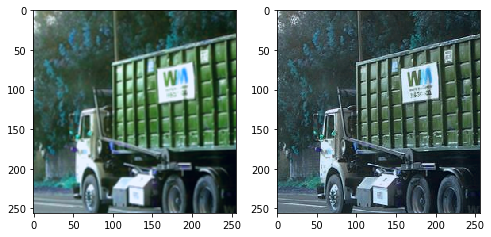

In [14]:
index = np.random.randint(0, len(data))
output = data[index]

view1 = output['view1']
view2 = output['view2']

f, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(move_channel_dim(view1.numpy()))
ax[1].imshow(move_channel_dim(view2.numpy()))

In [15]:
from pixpro.model import *
from torchvision.models import mobilenet_v2

In [16]:
model = PixPro(mobilenet_v2(), crop_size=(224, 224))

In [17]:
with torch.no_grad():
    y, yp, z, zp, v1, v2, v1b, v2b = model(view1.unsqueeze(0), view2.unsqueeze(0))
    #y, yp, z, zp, distances, view1, view2

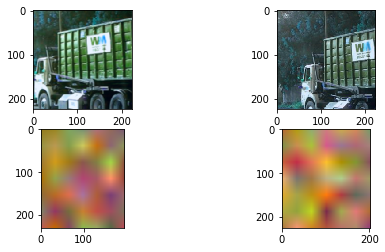

In [18]:
f, ax = plt.subplots(2, 2, figsize=(8, 4))
ax[0, 0].imshow(move_channel_dim(v1.squeeze().numpy()))
ax[0, 1].imshow(move_channel_dim(v2.squeeze().numpy()))
ax[1, 0].imshow(move_channel_dim(y.squeeze()[:3].numpy()))
ax[1, 1].imshow(move_channel_dim(zp.squeeze()[:3].numpy()))

In [19]:
from pixpro.model import *
criterion = ConsistencyLoss(distance_thr=32)

In [20]:
v1_locs, v2_matches = positive_pairs(v1b, v2b, 32)

In [63]:
a = torch.rand((14, 24))

In [64]:
a_flat = a.reshape(-1)

In [81]:
j = 1
i = 23
nrows, ncols = a.size()
a[j, i]

tensor(0.4412)

In [82]:
index = (j * ncols - 1) + (i + 1)
print(index)
a_flat[index]

47


tensor(0.4412)